## <h1><center>Data Challenge HMDA Data Analysis</center></h1>
<center>Jiafan(Kevin) Deng<center>

This project was written with Python2, please make sure you run this file under the Python2 environment. Also, this IPython file only include the tutorial in how I program while the market insights are included in another word file. Thank you!
<br>
Load the packages we need here, pandas and numpy are two very useful data analytics packages in Python and matplotlib is a python package used for drawing plots.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Data Munging
##### 1. Bucket "Loan_Amount_000" into reasonable groups
First, we need to read our data. But on the first time I read the data, python gave me warnings that there are mixed types in columns(3,4,5,7,8,9,12) in loans data, so I decided to specify dtype on these columns.

In [2]:
loans_cols = {'Census_Tract_Number': 'str',
            'FFIEC_Median_Family_Income': 'str',
            'County_Code': 'str',
            'MSA_MD': 'str',
            'Number_of_Owner_Occupied_Units': 'str',
            'Respondent_ID': 'str',
            'Tract_to_MSA_MD_Income_Pct': 'str'             
            }
# Please change to your directory when you run these lines of codes
institutions = pd.read_csv("C:\\Users\\Kevin Deng\\Desktop\\data-challenge-data-master\\2012_to_2014_institutions_data.csv")
loans = pd.read_csv("C:\\Users\\Kevin Deng\\Desktop\\data-challenge-data-master\\2012_to_2014_loans_data.csv",
                   dtype=loans_cols, na_values=['NA      ', 'NA    ', 'NA   ', 'NA', 'NA ', 'NaN', 'NAN', 'nan', ''])

Let's drill down to the Loan_Amount_000 to see the details in it.

In [3]:
print (loans['Loan_Amount_000'].describe())

count    1.321158e+06
mean     2.902331e+02
std      9.657792e+02
min      1.000000e+00
25%      1.530000e+02
50%      2.350000e+02
75%      3.470000e+02
max      9.962500e+04
Name: Loan_Amount_000, dtype: float64


But when we look into the distribution of Loan_Amount_000, we can see that

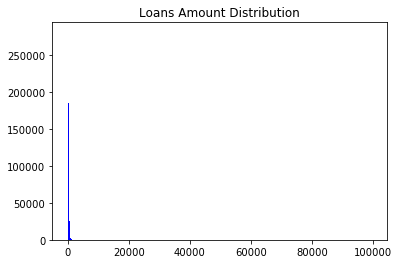

In [4]:
plt.title('Loans Amount Distribution')
plt.hist(loans['Loan_Amount_000'], bins = 1500, facecolor='blue')
plt.show()

We barely couldn't get any useful information except knowing that there are a large amount of data around 0, so we should zoom into that part to see the details.

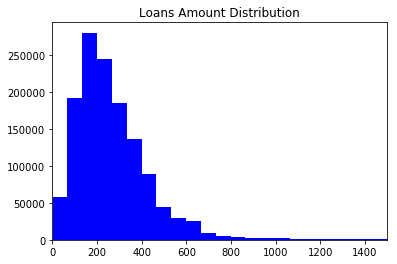

In [5]:
plt.title('Loans Amount Distribution')
plt.hist(loans['Loan_Amount_000'], bins = 1500, facecolor='blue')
plt.xlim((0,1500))
plt.show()

According to the bar plot above, it might be a good idea to divide Loan_Amount_000 into three levels: Low: 0 ~ 250k, Medium: 250k ~ 800k, High: 800k ~ MAX.

##### 2. Build hmda_init() function

In [6]:
def hmda_init(loans_data, institutions_data):
    hmda = pd.merge(loans_data, institutions_data, on=['Agency_Code', 'Respondent_ID', 'As_of_Year'], how='left')
        
    # Create a new group for Loan_Amount_000 and integrate into table loans
    # The three levels for Loan_Amount_000 are L(Low), M(Medium), H(High)
    loans_group=[]
    for i in range(0,len(hmda)):
        if hmda['Loan_Amount_000'][i]<=250:
            loans_group.append('L')
        elif hmda['Loan_Amount_000'][i]>250 and hmda['Loan_Amount_000'][i]<800:
            loans_group.append('M')
        else:
            loans_group.append('H')
            
    loanbucketdf=pd.DataFrame(loans_group, columns=['Loans_Group'], index=hmda.index)
    hmda=pd.concat([hmda, loanbucketdf], axis=1)
    return hmda

def hmda_to_json(hmda, states=None, conventional_conforming=None):
    # Please remember to change the path here when you run hmda_to_json on yout devices!
    save_path = 'C:\\Users\\Kevin Deng\\Documents\\hmda.JSON'
    if states != None and type(states) is not list:
        states = list(states)
    if states != None and conventional_conforming != None:
        output = hmda[hmda['State'].isin(states)][hmda['Conventional_Conforming_Flag'] == conventional_conforming]
        output.to_json(save_path)
        return ('Json file exported!')
    elif states != None and conventional_conforming == None:
        output = hmda[hmda['State'].isin(states)]
        output.to_json(save_path)
        return ('Json file exported!')
    elif states == None and conventional_conforming != None:
        output = hmda[hmda['Conventional_Conforming_Flag'] == conventional_conforming]
        output.to_json(save_path)
        return ('Json file exported!')
    else:
        print ('Attention: No states or conventional_conforming detected!')
        print ('Output all the data into json.....')
        hmda.to_json(save_path)
        return ('Json file exported!')

# Use the functions we created:
hmda = hmda_init(loans, institutions)
hmda_to_json(hmda)

Attention: No states or conventional_conforming detected!
Output all the data into json.....


'Json file exported!'

### Quality Check
For data quality, normally we should cover six dimensions of the data: 1.Completeness 2.Uniqueness 3.Timeliness 4.Validity 5.Accuracy 6.Consistency
<br>
As we only have one data set for each of loans data and institute data, we could not cover Accuracy and Consistency here but I would the rest four qualities.
<br>
First, let's check the completness of the data. Besides Loan_Amount_000 and Respondent_Name, I think we can check the completeness for every column of data. Below I built data_completeness to check a dataset's completeness.

##### 1. Completeness

In [7]:
def data_completeness(data):
    colnames = list(data)
    null_list = []
    for col in colnames:
        null_count = sum(data[col].isnull())
        null_list.append(null_count)
    completeness = pd.DataFrame({'Column_Name': colnames, 'Null_Count': null_list})
    return completeness
loans_completeness_check = data_completeness(loans)
institutions_completeness_check = data_completeness(institutions)
loans_completeness_check

,Column_Name,Null_Count
0,Agency_Code,0
1,Applicant_Income_000,0
2,As_of_Year,0
3,Census_Tract_Number,0
4,County_Code,837
5,FFIEC_Median_Family_Income,1677
6,Loan_Amount_000,0
7,MSA_MD,95217
8,Number_of_Owner_Occupied_Units,1874
9,Respondent_ID,0


In [8]:
institutions_completeness_check

,Column_Name,Null_Count
0,As_of_Year,0
1,Respondent_ID,0
2,Agency_Code,0
3,Respondent_Name_TS,0
4,Respondent_City_TS,0
5,Respondent_State_TS,0
6,Respondent_ZIP_Code,0
7,Parent_Name_TS,16197
8,Parent_City_TS,16200
9,Parent_State_TS,16169


##### 2. Uniqueness

In [9]:
def data_uniqueness(data, dataname):
    if dataname == 'loans':
        key_cols = ['Agency_Code', 'As_of_Year', 'Respondent_ID', 'Sequence_Number']
        data_duplicated = data[data.duplicated(key_cols, keep=False)]
        return data_duplicated
    elif dataname == 'institutions':
        key_cols = ['As_of_Year', 'Respondent_ID', 'Agency_Code', 'Respondent_Name_TS']
        data_duplicated = data[data.duplicated(key_cols, keep=False)]
        return data_duplicated
loans_uniqueness_check = data_uniqueness(loans, 'loans')
institutions_uniqueness_check = data_uniqueness(institutions, 'institutions')

In [10]:
loans_uniqueness_check

,Agency_Code,Applicant_Income_000,As_of_Year,Census_Tract_Number,County_Code,FFIEC_Median_Family_Income,Loan_Amount_000,MSA_MD,Number_of_Owner_Occupied_Units,Respondent_ID,...,Loan_Purpose_Description,Agency_Code_Description,Lien_Status_Description,Loan_Type_Description,State,County_Name,Conforming_Limit_000,Conventional_Status,Conforming_Status,Conventional_Conforming_Flag


In [11]:
institutions_uniqueness_check

,As_of_Year,Respondent_ID,Agency_Code,Respondent_Name_TS,Respondent_City_TS,Respondent_State_TS,Respondent_ZIP_Code,Parent_Name_TS,Parent_City_TS,Parent_State_TS,Parent_ZIP_Code,Assets_000_Panel


Therefore, there is no duplicated data in either loans or institutions.

##### 3. Timeliness
We know the data is from 2012 - 2014, so all the data in As_of_Year should be range from 2012 to 2014(inclusive).

In [12]:
def data_timeliness(data, time_col = 'As_of_Year'):
    data_timemin = min(data[time_col])
    data_timemax = max(data[time_col])
    if data_timemin == 2012 and data_timemax == 2014:
        return ('All the data in this data set is good in timeliness.')
    else:
        return ('Some data has timeliness problem!')

data_timeliness(loans)

'All the data in this data set is good in timeliness.'

In [13]:
data_timeliness(institutions)

'All the data in this data set is good in timeliness.'

##### 4. Validity
From the description of the data, we know that the Loan_Amount_000 should be less than Conforming_Limit_000. But if Loan_Amount_000 is more than Conforming_Limit_000, the value in Conforming_Status should be 'Jumbo' instead of 'Conforming'.

In [14]:
def data_validity(loan_data):
    invalid_data = loan_data[(loan_data['Loan_Amount_000'] > loan_data['Conforming_Limit_000']) 
                        & (loan_data['Conforming_Status'] == 'Conforming')]
    if len(invalid_data.index) == 0:
        return ('Data in loans is valid.')
    else:
        return ('There has invalid data in loans.')
data_validity(loans)

'Data in loans is valid.'

### Visualization
The details of this part would be included in HMDA Market Insights.pdf file.

After I drilled into the loans data, I determined that the “loan purpose” is either refinance or purchase. Purchase loans have higher interest rate than refinance loans because most home purchase loans are for first time buyers who do not have established credit. Also, purchase are typically larger than refinance loans and thus financial institutions stand to lose more money in the event of a default. Generally, purchase loans have more risks than refinance loans for financial institutions.

Therefore, my hypothesis is: Change Financial should enter the loan market in DC area, but the company needs to decide which sub-market should be entered.

##### 1. Visualize the market size by state and year

In [15]:
import seaborn as sns
total_amount_state_year = loans[['Loan_Amount_000', 'State', 'As_of_Year']] \
                             .groupby(['State', 'As_of_Year']).agg({"Loan_Amount_000": 'sum'}) \
                             .reset_index().sort_values(by=['Loan_Amount_000'], ascending=False).reset_index()
total_amount_state_year = total_amount_state_year[['State','As_of_Year', 'Loan_Amount_000']]

In [16]:
total_amount_state_year['Loan_Amount_e9'] = total_amount_state_year['Loan_Amount_000'] / 1000000
total_amount_state_year = total_amount_state_year[['State','As_of_Year', 'Loan_Amount_e9']]

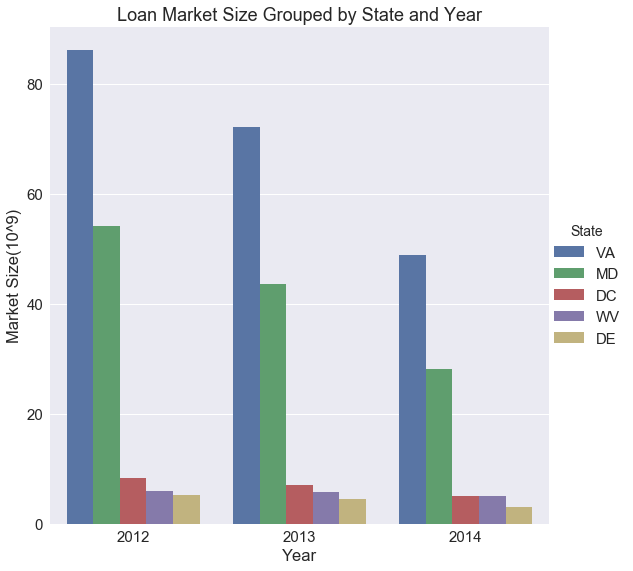

In [17]:
sns.set(font_scale = 1.5)
total = sns.factorplot(x = "As_of_Year", y = "Loan_Amount_e9", hue = "State", 
                   data = total_amount_state_year, kind="bar", size = 8)
total.set_ylabels("Market Size(10^9)")
total.set_xlabels("Year")
total.set(title = "Loan Market Size Grouped by State and Year")
total.savefig('total.jpg') 

##### 2. Visualize market size change in each state by years

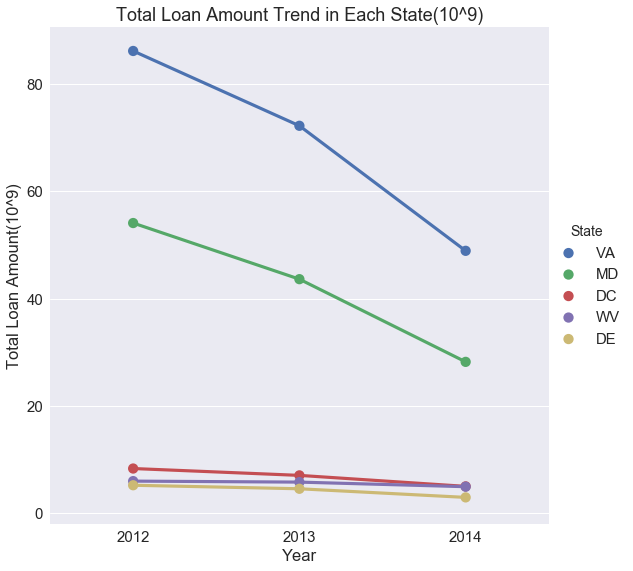

In [18]:
trend = sns.factorplot(x = "As_of_Year", y = "Loan_Amount_e9", hue = "State", 
                   data = total_amount_state_year, kind="point", size = 8)
trend.set_ylabels("Total Loan Amount(10^9)")
trend.set_xlabels("Year")
trend.set(title = "Total Loan Amount Trend in Each State(10^9)")
trend.savefig('trend.jpg') 

In [19]:
total_amount_state_year = total_amount_state_year.sort_values(by=['State', 'As_of_Year'])
change_rates = []
loans_year = list(total_amount_state_year['Loan_Amount_e9'])
total_amount_state_year
for i in range(len(loans_year)):
    if i % 3 == 0:
        change_rates.append(0)
    else:
        change_rates.append(round((loans_year[i]-loans_year[i-1])/loans_year[i-1]*100, 2))
total_amount_state_year['Changes(%)'] = np.asarray(change_rates)
total_amount_state_year = total_amount_state_year.reset_index()[['State','As_of_Year', 'Loan_Amount_e9', 'Changes(%)']]
total_amount_state_year

,State,As_of_Year,Loan_Amount_e9,Changes(%)
0,DC,2012,8.368582,0.00
1,DC,2013,7.092372,-15.25
2,DC,2014,5.044787,-28.87
3,DE,2012,5.253819,0.00
4,DE,2013,4.598409,-12.47
5,DE,2014,2.991961,-34.93
6,MD,2012,54.095591,0.00
7,MD,2013,43.640475,-19.33
8,MD,2014,28.235685,-35.30
9,VA,2012,86.144960,0.00


Threfore, from these two tables, we could see that the total amount of loans in the 5 states decreased by year.

##### 3. Visualize average loan amount in each state by years

In [20]:
average_amount_state_year = loans[['Loan_Amount_000', 'State', 'As_of_Year']] \
                             .groupby(['State', 'As_of_Year']).agg({"Loan_Amount_000": 'mean'}) \
                             .reset_index().sort_values(by=['Loan_Amount_000'], ascending=False).reset_index()
average_amount_state_year = average_amount_state_year[['State','As_of_Year', 'Loan_Amount_000']]
average_amount_state_year

,State,As_of_Year,Loan_Amount_000
0,DC,2014,445.141357
1,DC,2013,407.724748
2,DC,2012,403.635846
3,VA,2014,331.628617
4,VA,2012,299.019962
5,VA,2013,295.826269
6,MD,2014,290.004262
7,MD,2012,277.695255
8,MD,2013,271.950714
9,WV,2014,247.515320


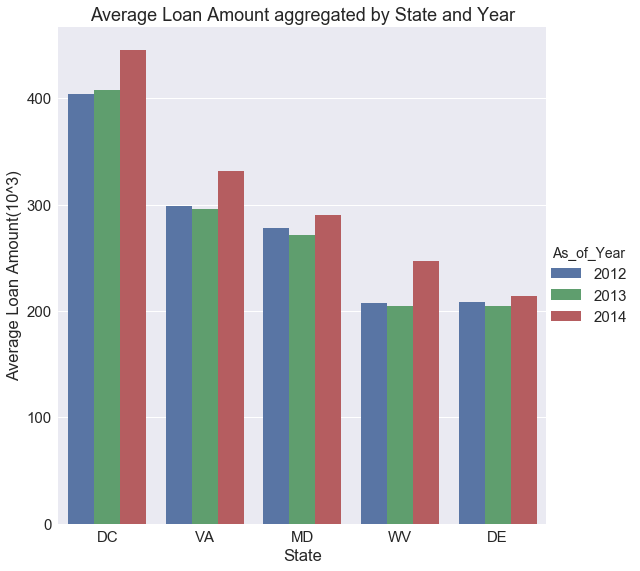

In [21]:
average = sns.factorplot(x = "State", y = "Loan_Amount_000", hue = "As_of_Year", 
                   data = average_amount_state_year, kind="bar", size = 8)
average.set_ylabels("Average Loan Amount(10^3)")
average.set_xlabels("State")
average.set(title = "Average Loan Amount aggregated by State and Year")
average.savefig('average.jpg')

From this average loan amount bar chart, we can see that actually, the average loan amount did not decrease but even increase from 2012 to 2014. Therefore, the main reason why market size shrank in these states should be the decrease in the number of loans.

##### 4. Visualize market share for different institutions in each state by years

In [22]:
inst_count_state_year = hmda[['State', 'Respondent_Name_TS', 'As_of_Year']] \
                   .groupby(['State', 'As_of_Year']) \
                   .agg({"Respondent_Name_TS": "count", "Respondent_Name_TS": lambda x: x.nunique()}) \
                   .reset_index().sort_values(by=['Respondent_Name_TS'], ascending=False)
inst_count_state_year

,State,As_of_Year,Respondent_Name_TS
9,VA,2012,742
10,VA,2013,741
11,VA,2014,729
7,MD,2013,624
6,MD,2012,610
8,MD,2014,600
14,WV,2014,342
12,WV,2012,334
3,DE,2012,328
13,WV,2013,326


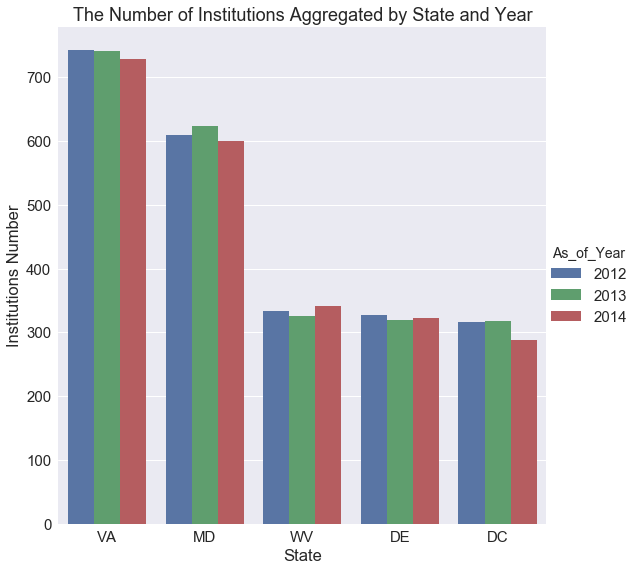

In [23]:
sns.set(font_scale = 1.5)
inst_count = sns.factorplot(x = "State", y = "Respondent_Name_TS", hue = "As_of_Year", 
                   data = inst_count_state_year, kind="bar", size = 8)
inst_count.set_ylabels("Institutions Number")
inst_count.set_xlabels("State")
inst_count.set(title = "The Number of Institutions Aggregated by State and Year")
inst_count.savefig('inst_count.jpg')

In [24]:
top_inst_state_year = hmda[['Loan_Amount_000', 'State', 'Respondent_Name_TS', 'As_of_Year']] \
                   .groupby(['State', 'As_of_Year', 'Respondent_Name_TS']) \
                   .agg({"Loan_Amount_000": 'sum'}) \
                   .reset_index().sort_values(by=['State', 'As_of_Year', 'Loan_Amount_000'], ascending=False)

In [25]:
top_inst_state_year['Loan_Amount_e6'] = top_inst_state_year['Loan_Amount_000'] / 1000
top_inst_state_year = top_inst_state_year[['State','As_of_Year', 'Respondent_Name_TS', 'Loan_Amount_e6']]

In [26]:
def top5_ins(data, statename):
    years = [2012, 2013, 2014]
    dfs = []
    for year in years:
        df = data[data['State'] == statename][data['As_of_Year'] == year].head(5)
        dfs.append(df)
    outcome = pd.concat(dfs, ignore_index=True)
    return outcome
top_inst_dc_year = top5_ins(top_inst_state_year, 'DC')
top_inst_wv_year = top5_ins(top_inst_state_year, 'WV')
top_inst_va_year = top5_ins(top_inst_state_year, 'VA')
top_inst_md_year = top5_ins(top_inst_state_year, 'MD')
top_inst_de_year = top5_ins(top_inst_state_year, 'DE')

D:\Ana\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


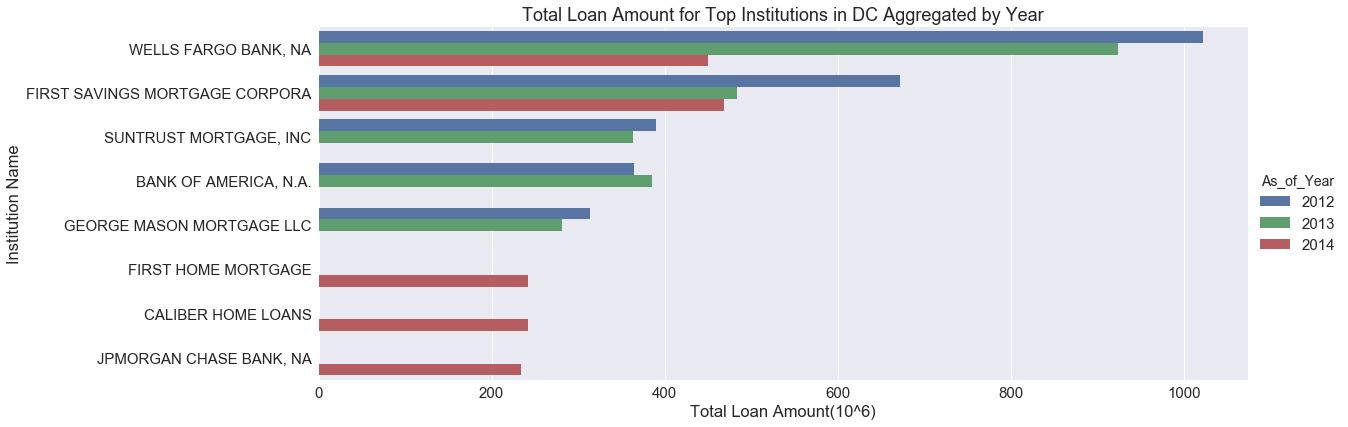

In [27]:
sns.set(font_scale = 1.5)
dc = sns.factorplot(x="Loan_Amount_e6", y="Respondent_Name_TS", hue='As_of_Year', 
                    data=top_inst_dc_year, kind='bar', size = 6, aspect = 3)
dc.set_ylabels("Institution Name")
dc.set_xlabels("Total Loan Amount(10^6)")
dc.set(title = "Total Loan Amount for Top Institutions in DC Aggregated by Year")
dc.savefig('DC.jpg')

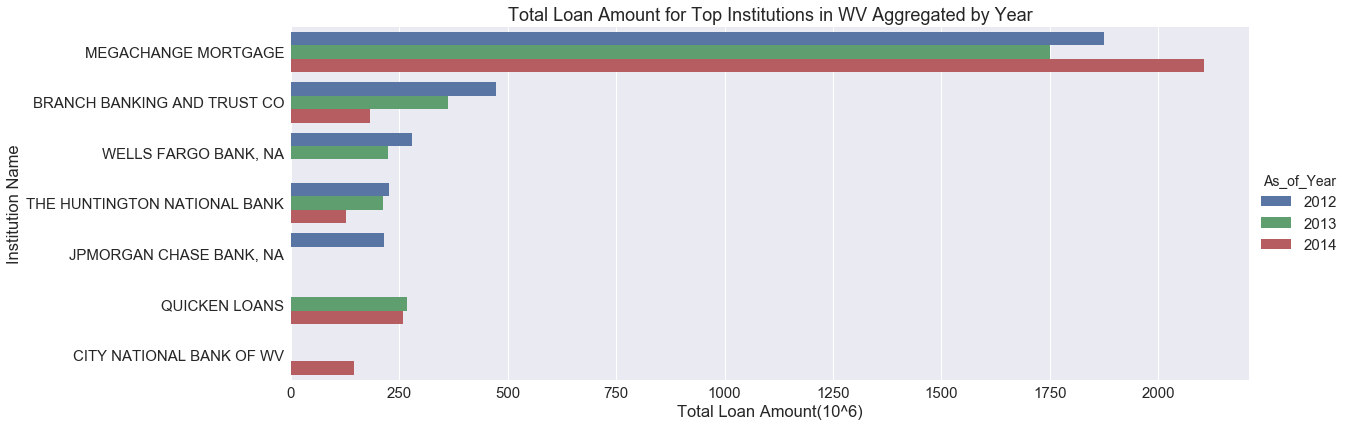

In [28]:
wv = sns.factorplot(x="Loan_Amount_e6", y="Respondent_Name_TS", hue='As_of_Year', 
                    data=top_inst_wv_year, kind='bar', size = 6, aspect = 3)
wv.set_ylabels("Institution Name")
wv.set_xlabels("Total Loan Amount(10^6)")
wv.set(title = "Total Loan Amount for Top Institutions in WV Aggregated by Year")
wv.savefig('WV.jpg')

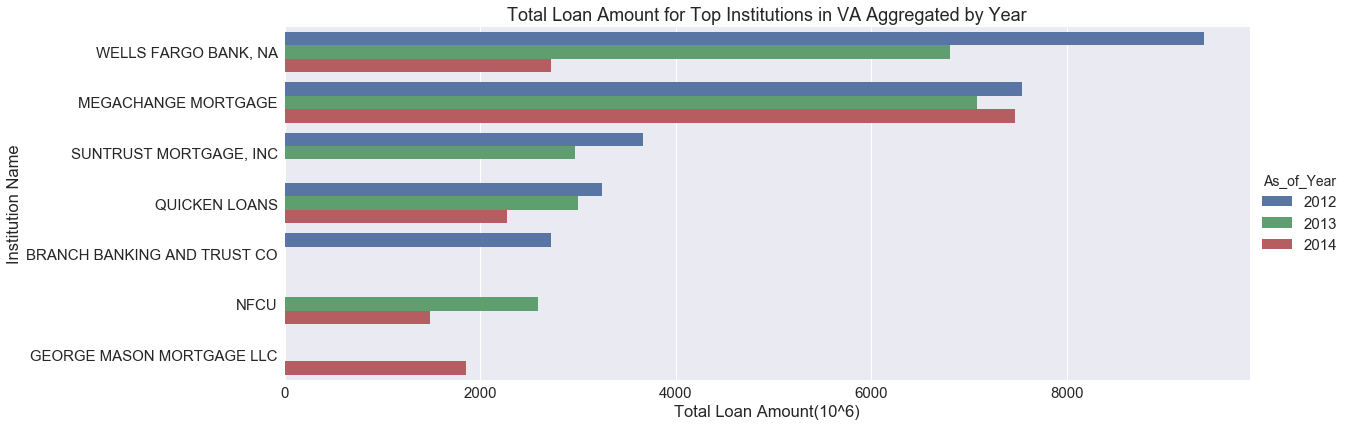

In [29]:
va = sns.factorplot(x="Loan_Amount_e6", y="Respondent_Name_TS", hue='As_of_Year', 
                    data=top_inst_va_year, kind='bar', size = 6, aspect = 3)
va.set_ylabels("Institution Name")
va.set_xlabels("Total Loan Amount(10^6)")
va.set(title = "Total Loan Amount for Top Institutions in VA Aggregated by Year")
va.savefig('VA.jpg')

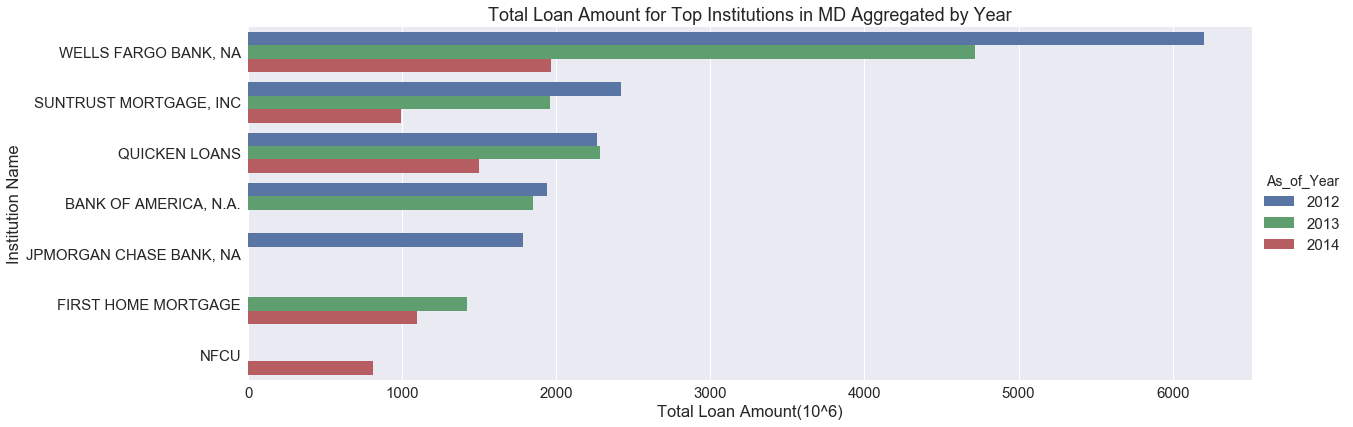

In [30]:
md = sns.factorplot(x="Loan_Amount_e6", y="Respondent_Name_TS", hue='As_of_Year', 
                    data=top_inst_md_year, kind='bar', size = 6, aspect = 3)
md.set_ylabels("Institution Name")
md.set_xlabels("Total Loan Amount(10^6)")
md.set(title = "Total Loan Amount for Top Institutions in MD Aggregated by Year")
md.savefig('MD.jpg')

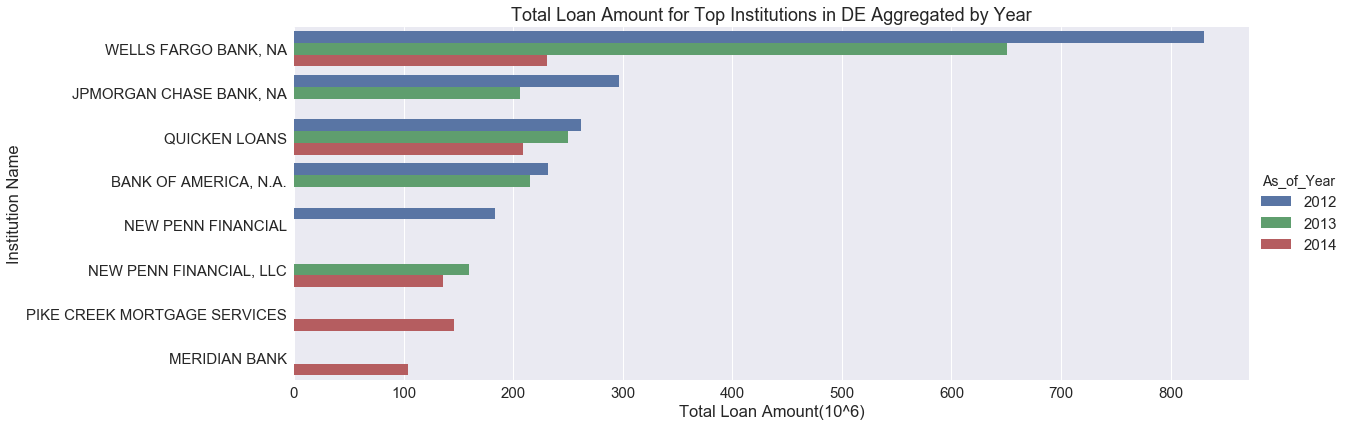

In [31]:
de = sns.factorplot(x="Loan_Amount_e6", y="Respondent_Name_TS", hue='As_of_Year', 
                    data=top_inst_de_year, kind='bar', size = 6, aspect = 3)
de.set_ylabels("Institution Name")
de.set_xlabels("Total Loan Amount(10^6)")
de.set(title = "Total Loan Amount for Top Institutions in DE Aggregated by Year")
de.savefig('DE.jpg')

Next, we can move forward how two specific loans, Refinance and Purchase, developed in these states from 2012 to 2014.

##### 5. Visualize loan groups for different states and years

In [32]:
count_loan_group_year = hmda[['Loan_Amount_000', 'As_of_Year', 'Loans_Group']] \
        .groupby(['Loans_Group', 'As_of_Year']) \
        .agg({"Loan_Amount_000": 'count'}) \
        .reset_index().sort_values(by=['Loan_Amount_000','Loans_Group','As_of_Year'], ascending=False).reset_index()
count_loan_group_year = count_loan_group_year[['Loans_Group', 'As_of_Year', 'Loan_Amount_000']]

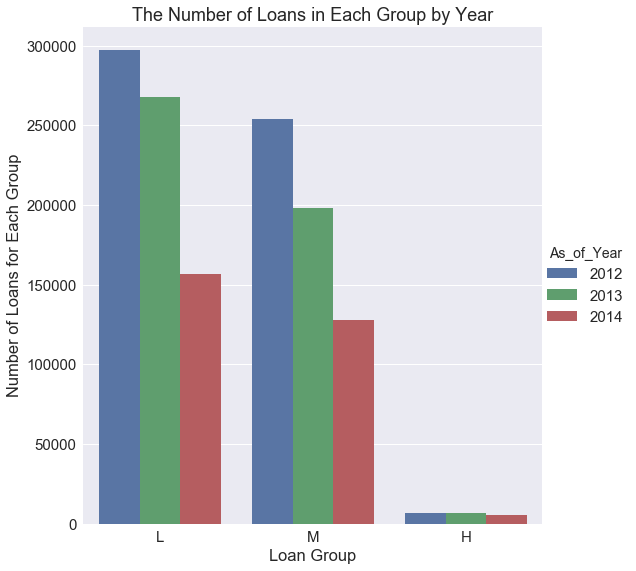

In [33]:
sns.set(font_scale = 1.5)
clg = sns.factorplot(x = "Loans_Group", y = "Loan_Amount_000", hue = "As_of_Year", 
                   data = count_loan_group_year, kind="bar", size = 8)
clg.set_ylabels("Number of Loans for Each Group")
clg.set_xlabels("Loan Group")
clg.set(title = "The Number of Loans in Each Group by Year")
clg.savefig('LoanGroupCount.jpg')

##### 6. Visualize specific loan markets for different states and years

In [34]:
amount_loan_group_state = loans[['State', 'Loan_Purpose_Description', 'Loan_Amount_000']] \
        .groupby(['State', 'Loan_Purpose_Description']) \
        .agg({"Loan_Amount_000": 'sum'}) \
        .reset_index().sort_values(by=['Loan_Amount_000','State','Loan_Purpose_Description'], ascending=False)
amount_loan_group_state['Loan_Amount_e9'] = amount_loan_group_state['Loan_Amount_000'] / 1000000

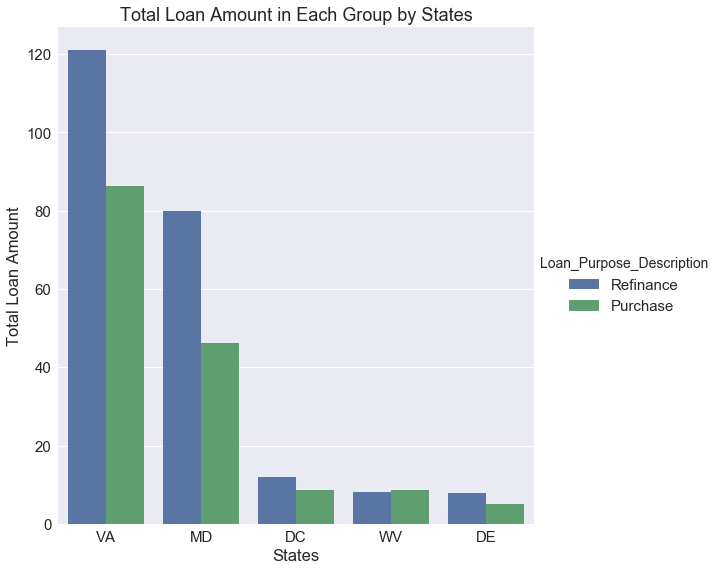

In [35]:
sns.set(font_scale = 1.5)
algs = sns.factorplot(x="State", y="Loan_Amount_e9", hue="Loan_Purpose_Description", data=amount_loan_group_state,
                   kind="bar",size=8)
algs.set_ylabels("Total Loan Amount")
algs.set_xlabels("States")
algs.set(title = "Total Loan Amount in Each Group by States")
algs.savefig('amount_loan_group_state.jpg')

In [36]:
amount_loan_year = loans[['As_of_Year', 'Loan_Purpose_Description', 'Loan_Amount_000']] \
        .groupby(['As_of_Year', 'Loan_Purpose_Description']) \
        .agg({"Loan_Amount_000": 'sum'}) \
        .reset_index().sort_values(by=['As_of_Year','Loan_Purpose_Description', 'Loan_Amount_000'], ascending=False)
amount_loan_year['Loan_Amount_e9'] = amount_loan_year['Loan_Amount_000'] / 1000000

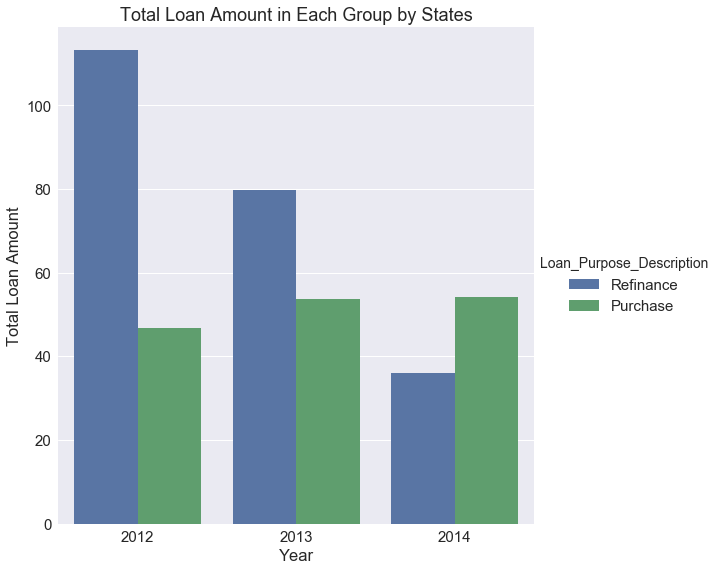

In [37]:
sns.set(font_scale = 1.5)
algy = sns.factorplot(x="As_of_Year", y="Loan_Amount_e9", hue="Loan_Purpose_Description", data=amount_loan_year,
                   kind="bar",size=8)
algy.set_ylabels("Total Loan Amount")
algy.set_xlabels("Year")
algy.set(title = "Total Loan Amount in Each Group by States")
algy.savefig('amount_loan_group_year.jpg')

In [38]:
average_loan_group_year = loans[['As_of_Year', 'Loan_Purpose_Description', 'Loan_Amount_000']] \
        .groupby(['As_of_Year', 'Loan_Purpose_Description']) \
        .agg({"Loan_Amount_000": 'mean'}) \
        .reset_index().sort_values(by=['As_of_Year', 'Loan_Purpose_Description', 'Loan_Amount_000'], ascending=False)

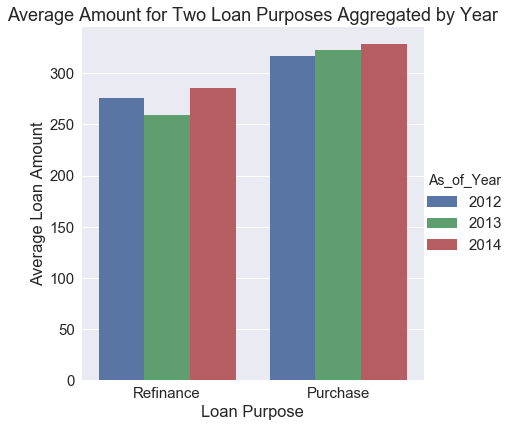

In [39]:
algy = sns.factorplot(x="Loan_Purpose_Description", y="Loan_Amount_000", hue="As_of_Year", data=average_loan_group_year,
                   kind="bar",size=6)

algy.set_ylabels("Average Loan Amount")
algy.set_xlabels("Loan Purpose")
algy.set(title="Average Amount for Two Loan Purposes Aggregated by Year")
algy.savefig('average_loan_group_year.jpg')

### Further Exploration
There are two perspectives inspired my interests: 
1. Could we clean up outliers in our data so we can get more accurate data?
2. Could we build a model to predict which kind a borrower is based on borrower's personal situation?(Low, Medium or High?) By building such a model, we could prompt our products to proper potential customers.

##### 1. Clean outliers

In [40]:
def outliers_cleaner(data, col, fence):
    '''
    data: enter the dataset you want to clean
    col(sting): enter the name of column you want to clean
    fence: enter the bounds that clean out the outliners
    '''
    try:
        data[col].astype(float)        
    except:
        return ('Please select a column only contains numbers!')
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    upper_fence = Q3 + (Q3 - Q1)*fence
    lower_fence = Q1 - (Q3 - Q1)*fence
    return data[data[col] >= lower_fence][data[col] <= upper_fence]

##### 2. Model Building
Before building our model, we should check our hmda data first.

In [41]:
hmda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1321158 entries, 0 to 1321157
Data columns (total 34 columns):
Agency_Code                       1321158 non-null int64
Applicant_Income_000              1321158 non-null object
As_of_Year                        1321158 non-null int64
Census_Tract_Number               1321158 non-null object
County_Code                       1320321 non-null object
FFIEC_Median_Family_Income        1319481 non-null object
Loan_Amount_000                   1321158 non-null int64
MSA_MD                            1225941 non-null object
Number_of_Owner_Occupied_Units    1319284 non-null object
Respondent_ID                     1321158 non-null object
Sequence_Number                   1321158 non-null int64
State_Code                        1321158 non-null int64
Tract_to_MSA_MD_Income_Pct        1318445 non-null object
MSA_MD_Description                1225941 non-null object
Loan_Purpose_Description          1321158 non-null object
Agency_Code_Descriptio

First, we need to process our data to be prepared.
<br>
From sklearn import preprocessing function to standardize our dataset.

In [42]:
from sklearn import preprocessing

le =preprocessing.LabelEncoder()
hmda_ml = hmda[['Agency_Code', 'Applicant_Income_000', 'As_of_Year', 'County_Code', 'FFIEC_Median_Family_Income', 'MSA_MD', 
                'Number_of_Owner_Occupied_Units', 'Respondent_ID', 'State_Code', 'Tract_to_MSA_MD_Income_Pct', 
                'Loan_Purpose_Description', 'Lien_Status_Description', 'Loan_Type_Description', 'Conforming_Limit_000', 
                'Conventional_Status', 'Conforming_Status', 'Conventional_Conforming_Flag', 'Loans_Group']]

hmda_ml.Applicant_Income_000 = hmda_ml.Applicant_Income_000.convert_objects(convert_numeric=True)
hmda_ml.County_Code = hmda_ml.County_Code.convert_objects(convert_numeric=True)
hmda_ml.FFIEC_Median_Family_Income = hmda_ml.FFIEC_Median_Family_Income.convert_objects(convert_numeric=True)
hmda_ml.MSA_MD = hmda_ml.MSA_MD.convert_objects(convert_numeric=True)
hmda_ml.Number_of_Owner_Occupied_Units = hmda_ml.Number_of_Owner_Occupied_Units.convert_objects(convert_numeric=True)
hmda_ml.State_Code = hmda_ml.State_Code.convert_objects(convert_numeric=True)
hmda_ml.Tract_to_MSA_MD_Income_Pct = hmda_ml.Tract_to_MSA_MD_Income_Pct.convert_objects(convert_numeric=True)
hmda_ml.Loan_Purpose_Description = hmda_ml.Loan_Purpose_Description.astype('category')
hmda_ml.Lien_Status_Description = hmda_ml.Lien_Status_Description.astype('category')
hmda_ml.Loan_Type_Description = hmda_ml.Loan_Type_Description.astype('category')
hmda_ml.Conventional_Status = hmda_ml.Conventional_Status.astype('category')
hmda_ml.Conforming_Status = hmda_ml.Conforming_Status.astype('category')
hmda_ml.Conventional_Conforming_Flag = hmda_ml.Conventional_Conforming_Flag.astype('category')
hmda_ml.Loans_Group = hmda_ml.Loans_Group.astype('category')

hmda_ml = hmda_ml.dropna(how='any',axis=0)

hmda_ml.info()

D:\Ana\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
D:\Ana\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
D:\Ana\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  # Remove the CWD from sys.path while we load stuff.
D:\Ana\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  # This is

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1113588 entries, 0 to 1311525
Data columns (total 18 columns):
Agency_Code                       1113588 non-null int64
Applicant_Income_000              1113588 non-null float64
As_of_Year                        1113588 non-null int64
County_Code                       1113588 non-null float64
FFIEC_Median_Family_Income        1113588 non-null float64
MSA_MD                            1113588 non-null float64
Number_of_Owner_Occupied_Units    1113588 non-null float64
Respondent_ID                     1113588 non-null object
State_Code                        1113588 non-null int64
Tract_to_MSA_MD_Income_Pct        1113588 non-null float64
Loan_Purpose_Description          1113588 non-null category
Lien_Status_Description           1113588 non-null category
Loan_Type_Description             1113588 non-null category
Conforming_Limit_000              1113588 non-null float64
Conventional_Status               1113588 non-null category
Confo

In [43]:
data = pd.DataFrame()
encoders = []
for column in hmda_ml.columns: 
    enc = preprocessing.LabelEncoder()
    encoders.append(enc.fit_transform(hmda_ml[column]))
    data[column] = enc.transform(hmda_ml[column])

In [44]:
x_data = data[['Agency_Code', 'Applicant_Income_000', 'As_of_Year', 'County_Code', 'FFIEC_Median_Family_Income', 'MSA_MD', 
                'Number_of_Owner_Occupied_Units', 'Respondent_ID', 'State_Code', 'Tract_to_MSA_MD_Income_Pct', 
                'Loan_Purpose_Description', 'Lien_Status_Description', 'Loan_Type_Description', 'Conforming_Limit_000', 
                'Conventional_Status', 'Conforming_Status', 'Conventional_Conforming_Flag']]
t_response = data[['Loans_Group']]

In [45]:
from sklearn.preprocessing import StandardScaler
S = StandardScaler()
t_data = S.fit_transform(x_data)

Split our dataset into train set and test set.

In [46]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(t_data, t_response, test_size = 0.25, random_state = 33)

D:\Ana\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


First, I want to apply SVM on our dataset.

In [47]:
# Import svm and predict by svm
from sklearn import svm  
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
dtc = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5, random_state=42)
dtc.fit(x_train, y_train)
print(classification_report(y_test, dtc.predict(x_test)))

D:\Ana\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


             precision    recall  f1-score   support

          0       1.00      0.00      0.00      4397
          1       0.79      0.82      0.80    146781
          2       0.76      0.75      0.75    127219

avg / total       0.78      0.77      0.77    278397



SVM could reach 78% accuracy on average.
<br>
Then, I want to build a Decision Tree model.

In [48]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
print(classification_report(y_test, clf.predict(x_test)))

             precision    recall  f1-score   support

          0       0.56      0.56      0.56      4397
          1       0.76      0.76      0.76    146781
          2       0.71      0.71      0.71    127219

avg / total       0.74      0.74      0.74    278397



By using a Decision Tree model, we could achieve 73% accuracy. Unfortunately, it does not perform as good as SVM.
<br>
Next, I would try Random Forest.

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print(classification_report(y_test, rf.predict(x_test)))

D:\Ana\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


             precision    recall  f1-score   support

          0       0.63      0.63      0.63      4397
          1       0.79      0.83      0.81    146781
          2       0.78      0.73      0.76    127219

avg / total       0.78      0.78      0.78    278397



From the classification report, we could achieve 78% accuracy for Random Forest model.

Here I want to use xgboost because xgboost is a very useful and powerful boosted tree method in machine learning.
<br>
If you did not have xgboost on your devices, you could follow this link to install:
<br>
https://oreki47.blog/2017/07/20/xgboost-installation-with-windows-10-python-2-7-anaconda/

In [50]:
import xgboost as xgb
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

In [51]:
params={
'booster':'gbtree',
'objective': 'multi:softmax', 
'num_class':3, 
'gamma':0.1,  
'max_depth':12, 
'lambda':2,  
'subsample':0.7,
'colsample_bytree':0.7, 
'min_child_weight':3, 
'silent':0 ,
'eta': 0.007, 
'seed':1000,
'nthread':7,
}
plst = list(params.items())

In [52]:
evallist  = [(dtest,'eval'), (dtrain,'train')]
# I tried 100, 150, 200 rounds here but they all got quiet similar results as 50 rounds, so I selected 50 here.
num_round = 50
bst = xgb.train( plst, dtrain, num_round, evallist)

[0]	eval-merror:0.205699	train-merror:0.198848
[1]	eval-merror:0.204657	train-merror:0.198155
[2]	eval-merror:0.201909	train-merror:0.194855
[3]	eval-merror:0.200753	train-merror:0.19301
[4]	eval-merror:0.199704	train-merror:0.191592
[5]	eval-merror:0.199226	train-merror:0.191865
[6]	eval-merror:0.200067	train-merror:0.192913
[7]	eval-merror:0.19993	train-merror:0.192963
[8]	eval-merror:0.200595	train-merror:0.193578
[9]	eval-merror:0.199489	train-merror:0.19234
[10]	eval-merror:0.199341	train-merror:0.192125
[11]	eval-merror:0.198274	train-merror:0.191143
[12]	eval-merror:0.198497	train-merror:0.190849
[13]	eval-merror:0.198088	train-merror:0.190458
[14]	eval-merror:0.198062	train-merror:0.190524
[15]	eval-merror:0.198016	train-merror:0.190492
[16]	eval-merror:0.198113	train-merror:0.190491
[17]	eval-merror:0.19807	train-merror:0.190571
[18]	eval-merror:0.197869	train-merror:0.190531
[19]	eval-merror:0.197872	train-merror:0.190516
[20]	eval-merror:0.197624	train-merror:0.190133
[21]	e

In [53]:
print(classification_report(y_test, bst.predict(dtest)))

             precision    recall  f1-score   support

          0       0.76      0.48      0.59      4397
          1       0.83      0.82      0.82    146781
          2       0.78      0.80      0.79    127219

avg / total       0.80      0.80      0.80    278397



By building the xgboost model, we could get 80% accuracy for predictions.

Then I want to do a Principal Component Analysis to select variables and apply the selected variables to our models.

In [73]:
from sklearn.decomposition import PCA  
pca=PCA(n_components=7)
t_data = pca.fit_transform(x_data)
S = StandardScaler()
t_data = S.fit_transform(t_data)
x_train, x_test, y_train, y_test = train_test_split(t_data, t_response, test_size = 0.25, random_state = 33)
# Repeat all the models I built before
dtc = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5, random_state=42)
dtc.fit(x_train, y_train)
print(classification_report(y_test, dtc.predict(x_test)))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      4397
          1       0.77      0.81      0.79    146781
          2       0.74      0.72      0.73    127219

avg / total       0.74      0.76      0.75    278397



In [74]:
# Decision Trees
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
print(classification_report(y_test, clf.predict(x_test)))

             precision    recall  f1-score   support

          0       0.33      0.35      0.34      4397
          1       0.74      0.74      0.74    146781
          2       0.69      0.68      0.68    127219

avg / total       0.71      0.71      0.71    278397



In [75]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print(classification_report(y_test, rf.predict(x_test)))

D:\Ana\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


             precision    recall  f1-score   support

          0       0.47      0.34      0.40      4397
          1       0.77      0.80      0.79    146781
          2       0.74      0.72      0.73    127219

avg / total       0.75      0.75      0.75    278397



In [76]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
params={
'booster':'gbtree',
'objective': 'multi:softmax', 
'num_class':3, 
'gamma':0.1,  
'max_depth':12, 
'lambda':2,  
'subsample':0.7,
'colsample_bytree':0.7, 
'min_child_weight':3, 
'silent':0 ,
'eta': 0.007, 
'seed':1000,
'nthread':7,
}
plst = list(params.items())
evallist  = [(dtest,'eval'), (dtrain,'train')]
num_round = 50
bst = xgb.train( plst, dtrain, num_round, evallist)

[0]	eval-merror:0.233925	train-merror:0.220857
[1]	eval-merror:0.236475	train-merror:0.224781
[2]	eval-merror:0.228063	train-merror:0.215461
[3]	eval-merror:0.226536	train-merror:0.213597
[4]	eval-merror:0.22437	train-merror:0.210949
[5]	eval-merror:0.223171	train-merror:0.20975
[6]	eval-merror:0.222337	train-merror:0.208597
[7]	eval-merror:0.221888	train-merror:0.208246
[8]	eval-merror:0.222172	train-merror:0.20877
[9]	eval-merror:0.221888	train-merror:0.208409
[10]	eval-merror:0.221903	train-merror:0.208872
[11]	eval-merror:0.222061	train-merror:0.208491
[12]	eval-merror:0.221885	train-merror:0.208285
[13]	eval-merror:0.221795	train-merror:0.208239
[14]	eval-merror:0.221841	train-merror:0.208139
[15]	eval-merror:0.221558	train-merror:0.207924
[16]	eval-merror:0.221594	train-merror:0.208272
[17]	eval-merror:0.221852	train-merror:0.208158
[18]	eval-merror:0.221457	train-merror:0.207824
[19]	eval-merror:0.221443	train-merror:0.207667
[20]	eval-merror:0.220965	train-merror:0.207238
[21]	

In [77]:
print(classification_report(y_test, bst.predict(dtest)))

             precision    recall  f1-score   support

          0       0.68      0.13      0.21      4397
          1       0.81      0.80      0.80    146781
          2       0.75      0.77      0.76    127219

avg / total       0.78      0.78      0.78    278397



I tried PCA's components from 5 to 10 but it seems that PCA could not provide me with better accuracy, so the best model is still XGBoost without PCA.